1. Install Required Library

In [1]:
!pip install numpy scikit-surprise
!pip install numpy --no-cache-dir --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 5.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2469523 sha256=8f23522ecba4d2770d487ef6dfbf026843dd064248ddf8d174906ef7fae26aa4
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 293.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following

In [2]:
!pip install langchain requests langchain_community
!pip install transformers accelerate
!pip uninstall -y numpy scikit-learn
!pip install numpy scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.9/438.9 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.65
    Uninstalling langchain-core-0.3.65:
      Successfully uninstalled langchain-core-0.3.65
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.25
    Uninstalling langchain-0.3.25:
      Successfully uninstalled langchain-0.3.25
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
import numpy as np
from langchain.llms import Ollama
import gradio as gr
import requests
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Load and Inspect the Data

investments = pd.read_csv("investments.csv")
institutions = pd.read_csv('institutions.csv')

In [3]:
# Check for Missing or Duplicate Data
investments.isnull().sum()  # Missing values per column
investments.duplicated().sum()  # Duplicate rows
# Remove duplicate data if present
investments.drop_duplicates(inplace=True)
investments.dropna(subset=['account_id', 'security_id', 'institution_value'], inplace=True)

In [4]:
# Investments per user
investments.groupby('account_id')['institution_value'].sum().sort_values(ascending=False).head(10)

,institution_value
account_id,
1NXlXlwoxeSgEqzW1amghxB6LzbqZjcp84G7Q,25125.63318
1gBDlnnnXXcmaRrxwDbQso7wpREvdpFpJvGPv,25125.63318
5lDK7ApV7Vf1Zv9N3LMKSoGwZEp8vBu5L6RBE,25125.63318
4KrkRdm4zls5eqqpdq9QsPxglkg7jzCJE9v4d,25125.63318
744wrJ5dPAIB9NMyzoj4FW68EVKvKrHd3yANz,25125.63318
6QowN511j8FGerzqGwlNSWddJb5wj3T8Qqqkb,25125.63318
9nmq6Nq7nwiamEXgypVdILvxAmRXElt49kGe7,25125.63318
9qD8mQlPZpfa46vQppoxIL4NE73a3jF49km7B,25125.63318
APLm1D5p9dug55l85onah7KDGndJxaH9rG8RV,25125.63318


In [6]:
"""" Understand the Columns
Check typical investment dataset columns like:

account_id: Unique user

security_id: Unique investment item

institution_value: Amount invested

timestamp or date: (Optional) investment time

sector / security_type: (Optional) category"""

investments.columns  # All columns
investments.nunique()  # Unique values per column

,0
account_id,158
cost_basis,12
institution_price,12
institution_price_as_of,1
institution_price_datetime,0
institution_value,13
iso_currency_code,1
quantity,13
security_id,12
unofficial_currency_code,0


In [7]:
# Most popular securities
investments['security_id'].value_counts().head(10)

,count
security_id,
d6ePmbPxgWCWmMVv66q9iPV94n91vMtov5Are,158
KDwjlXj1Rqt58dVvmzRguxJybmyQL8FgeWWAy,79
NDVQrXQoqzt5v3bAe8qRt4A7mK7wvZCLEBBJk,79
8E4L9XLl6MudjEpwPAAgivmdZRdBPJuvMPlPb,79
9EWp9Xpqk1ua6DyXQb89ikMARWA6eyUzAbPMg,79
abJamDazkgfvBkVGgnnLUWXoxnomp5up8llg4,79
lngLy3Le7vflLnAzKqwZs19l6bl8P5H1jG9Zz,79
JDdP7XPMklt5vwPmDN45t3KAoWAPmjtpaW7DP,79
QDQ13y1Ezxt51QbDb6A8cjk9EK978our9NaAM,79


In [8]:
# Export Insights
## Top Securities ##
investments.groupby('security_id')['institution_value'].sum().sort_values(ascending=False)#.to_csv('top_securities.csv')

,institution_value
security_id,
d6ePmbPxgWCWmMVv66q9iPV94n91vMtov5Are,975308.72000
eW4jmnjd6AtjxXVrjmj6SX1dNEdZp3Cy8RnRQ,584401.71000
MD9eKXeplrt5yKRlzLqXiavwb6wrdxUb3wdnM,146614.12500
nnmo8doZ4lfKNEDe3mPJipLGkaGw3jfPrpxoN,108521.23350
QDQ13y1Ezxt51QbDb6A8cjk9EK978our9NaAM,74898.32000
JDdP7XPMklt5vwPmDN45t3KAoWAPmjtpaW7DP,50268.41100
lngLy3Le7vflLnAzKqwZs19l6bl8P5H1jG9Zz,33970.00000
abJamDazkgfvBkVGgnnLUWXoxnomp5up8llg4,16649.25000
9EWp9Xpqk1ua6DyXQb89ikMARWA6eyUzAbPMg,9130.24172


## Cross-Tabulations

Clustered behavior(HeatMap Matrix):

A few securities (columns) have consistently high investments across many users — possibly popular or high-trust investments.

Some users (rows) are investing mostly in just 1-2 securities → potential for cross-selling recommendations.
These pattern helps in validating clusterin result and were also useful in forming LLM Prompts.


Text(0.5, 1.0, 'User-Security Investment Heatmap')

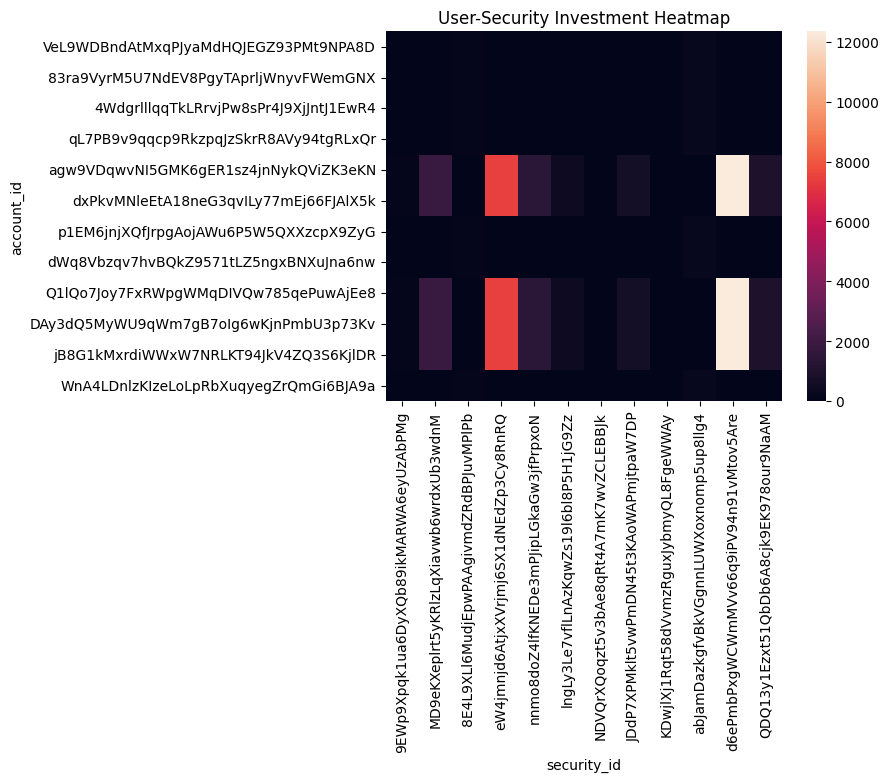

In [9]:
# User vs Security heatmap
user_item_matrix = investments.pivot_table(index='account_id', columns='security_id', values='institution_value', fill_value=0)

sns.heatmap(user_item_matrix.sample(12, axis=0).sample(12, axis=1))  # Random sample for visibility
plt.title("User-Security Investment Heatmap")

In [10]:
# Check Sparsity (Important for Recommenders)
# High sparsity (e.g., 95%+) means most users invest in
# only a few securities — common and expected in recommender systems.
total_entries = user_item_matrix.size
nonzero_entries = (user_item_matrix > 0).sum().sum()
sparsity = 1 - (nonzero_entries / total_entries)

print(f"Sparsity: {sparsity:.2%}")

Sparsity: 45.83%


45.83% of the entries in your user-item matrix are non-zero, and the rest (54.17%) are zero.

Insights After Clustering

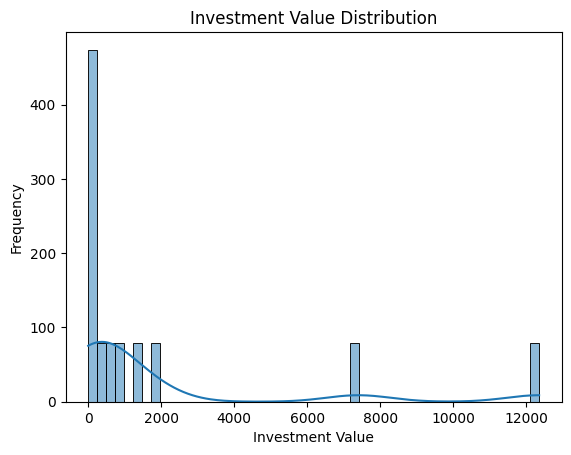

In [11]:
# Investment distribution
sns.histplot(investments['institution_value'], bins=50, kde=True)
plt.title("Investment Value Distribution")
plt.xlabel("Investment Value")
plt.ylabel("Frequency")
plt.show()

Long-tail effect:
The above histogram shows,
Many securities receive low or no investments → cold-start challenge for recommender systems.

User types emerging:

Some users invest across many different securities, others are narrowly focused — you could cluster users based on these behaviors.
Most investments are very small (clustered on the left near 0–1000)

There are several spikes at larger values like ~7000 and ~12000 — these are likely predefined allocation buckets (e.g., high-net-worth portfolios)

The distribution is right-skewed — a common trait in financial data

The KDE curve is non-smooth because of the presence of discrete jumps, likely due to tiered or system-generated investment values

##  Build a Recommendation Engine

Below are 2 approches that look similar on the surface but differ in how they reconstruct the predicted matrix from the SVD model.   
Read the same investments.csv dataset.  
Filter rows where institution_value > 0 (positive signals).  
Create a user-item matrix (account_id × security_id).  
Use Truncated SVD to extract latent factors and make predictions.  
Define a function to recommend unseen securities for a given user.  

In [35]:
df = pd.read_csv("investments.csv")
# Keep valid signals
# We're keeping only rows where institution_value > 0.
# This means the user actually invested in the security (so it's a positive interaction).
# It's like saying: "Only include what the user showed interest in."
df = df[df['institution_value'] > 0]
# Create user-item matrix (rows: users, cols: securities)
# Step 1: Aggregate user behavior features for clustering
user_behavior = df.groupby('account_id').agg({
    'security_id': 'nunique',       # number of unique securities per user
    'institution_value': 'sum'      # total invested amount per user
}).rename(columns={
    'security_id': 'num_securities',
    'institution_value': 'total_invested'
})

user_item_matrix = df.pivot_table(index='account_id', columns='security_id', values='institution_value', fill_value=0)
svd = TruncatedSVD(n_components=12, random_state=42)
user_factors = svd.fit_transform(user_item_matrix) # matrix U


In [32]:
# @title
# ##################### Approach 1 ###########################
# """
# Manually reconstructing the low-rank approximation of the original matrix.

# Gives flexibility: you can inspect or modify user_factors and item_factors.

# Useful if you want to add additional embeddings, regularization, or analyze components.
#   """
# svd = TruncatedSVD(n_components=12, random_state=42)
# #manually reconstruct the approximate matrix by multiplying the decomposed matrices U and V^T.
# user_factors = svd.fit_transform(user_item_matrix) # matrix U
# item_factors = svd.components_.T  # matrix V^T transpose to match format
# #Reconstruct predicted investment strength
# predicted_matrix = np.dot(user_factors, item_factors)
# # Convert to DataFrame for easy access
# predicted_df = pd.DataFrame(predicted_matrix, index=user_item_matrix.index, columns=user_item_matrix.columns)
# # Recommend items
# def recommend_items(user_id, top_n=5):
#     #Get predicted scores for this user
#     user_scores = predicted_df.loc[user_id]
#     # Filter out securities already invested in
#     already_invested = user_item_matrix.loc[user_id]
#     unseen_scores = user_scores[already_invested == 0]
#     # Return top N predictions
#     return unseen_scores.sort_values(ascending=False).head(top_n)

# sample_user_approach1 = user_item_matrix.index[0]
# print("Top recommendations for user:", sample_user_approach1)
# print(recommend_items(sample_user_approach1))


Top recommendations for user: 1NXlXlwoxeSgEqzW1amghxB6LzbqZjcp84G7Q
security_id
8E4L9XLl6MudjEpwPAAgivmdZRdBPJuvMPlPb    0.000062
abJamDazkgfvBkVGgnnLUWXoxnomp5up8llg4   -0.102184
Name: 1NXlXlwoxeSgEqzW1amghxB6LzbqZjcp84G7Q, dtype: float64


In [33]:
################### Approach2 ###################

"""
Uses built-in inverse_transform.
More concise & abstract
Great for quick baseline recommendations
 """

# Reconstruct the approximate matrix
approx_matrix = svd.inverse_transform(user_item_matrix) #  built-in inverse_transform method
# Convert to DataFrame for easy access
approx_df = pd.DataFrame(approx_matrix, index=user_item_matrix.index, columns=user_item_matrix.columns)

# Recommendation function
def recommend_svd(user_id, top_n=5):
    user_vector = approx_df.loc[user_id]
    already_invested = user_item_matrix.loc[user_id] > 0
    recommendations = user_vector[~already_invested]
    return recommendations.sort_values(ascending=False).head(top_n)

sample_user_approach2 = user_item_matrix.index[0]
print(f"Top recommendations for {sample_user_approach2}")
print(recommend_svd(sample_user_approach2))

Top recommendations for 1NXlXlwoxeSgEqzW1amghxB6LzbqZjcp84G7Q
security_id
abJamDazkgfvBkVGgnnLUWXoxnomp5up8llg4    92.820065
8E4L9XLl6MudjEpwPAAgivmdZRdBPJuvMPlPb    71.963249
Name: 1NXlXlwoxeSgEqzW1amghxB6LzbqZjcp84G7Q, dtype: float64


## Clustering

 Clustering Users Based on Their Investments
We'll use KMeans to group similar users together based on their investment patterns.

In [45]:
# Aggregate user behavior features for clustering
user_behavior = df.groupby('account_id').agg({
    'security_id': 'nunique',       # num_unique_securities per user
    'institution_value': 'sum'      # total invested per user
}).rename(columns={
    'security_id': 'num_securities',
    'institution_value': 'total_invested'
})

# Create user-item matrix (needed for top securities per cluster)
user_item_matrix = df.pivot_table(index='account_id', columns='security_id',
                                 values='institution_value', fill_value=0)
# Scale features and run clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(user_behavior)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

user_behavior["cluster"] = labels
# Apply DBSCAN
# db = DBSCAN(eps=0.5, min_samples=5)
# labels = db.fit_predict(X_scaled)

# # Assign cluster labels
# user_behavior["cluster"] = labels

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1363: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Summarize Each Cluster
We'll extract for each cluster:

Average number of securities per user

Average investment amount

Most commonly invested securities

In [46]:
cluster_profiles = {}

for cluster_id in sorted(user_behavior['cluster'].unique()):
    cluster_data = user_behavior[user_behavior['cluster'] == cluster_id].drop(columns='cluster')

    avg_investments = cluster_data['num_securities'].mean()
    total_invested = cluster_data['total_invested'].mean()

    # Get users belonging to the cluster
    users_in_cluster = user_behavior[user_behavior['cluster'] == cluster_id].index
    cluster_user_items = user_item_matrix.loc[users_in_cluster]

    # Sum investments by security across users in cluster and get top 3 securities
    top_securities = cluster_user_items.sum().sort_values(ascending=False).head(3).index.tolist()

    cluster_profiles[cluster_id] = {
        "avg_investments": round(avg_investments, 2),
        "total_invested": round(total_invested, 2),
        "top_securities": top_securities
    }


## Merge and Recommend using original Institution names.

In [47]:
# Merge to enrich investment data
df_merged = investments.merge(institutions, on='institution_id', how='left')
# df_merged.head()

In [48]:
# Build a mapping: security_id → institution_name
security_to_institution = df_merged.dropna(subset=['institution_id'])[['security_id', 'institution_id']].drop_duplicates()
security_to_institution_map = dict(zip(security_to_institution['security_id'], security_to_institution['institution_id']))
# Create institution_id → institution_name mapping
institution_id_to_name = dict(zip(institutions['institution_id'], institutions['name']))

# Create security_id → institution_name mapping by chaining the two mappings
security_to_institution_name = {
    sec_id: institution_id_to_name.get(inst_id, "Unknown Institution")
    for sec_id, inst_id in security_to_institution_map.items()
}


In [49]:
# Add human-readable institutions to top securities per cluster
for cluster_id, profile in cluster_profiles.items():
    # Map security_id → institution_id
    institution_ids = [
        security_to_institution_map.get(sec_id, None)
        for sec_id in profile["top_securities"]
    ]
    # Map institution_id → institution_name, filter None and unknowns
    institution_names = [
        institution_id_to_name.get(inst_id, "Unknown Institution")
        for inst_id in institution_ids if inst_id is not None
    ]
    profile["top_institutions"] = institution_names

## Generating Recommendations with Mistral

In [50]:
# Install Ollama ---
!curl -fsSL https://ollama.com/install.sh | sh
# Pull a model (Mistral) ---
!ollama pull mistral
import requests
import sys
# Start Ollama Server in Background ---
print("Starting Ollama server in the background with nohup...")
# Run the server in background, redirect stdout and stderr to a log file
!nohup ollama serve > ollama.log 2>&1 &
# Wait for Ollama to fully initialize ---
import time
print("Waiting 15 seconds for Ollama server to start...")
time.sleep(15)
# Verify Server is Running ---


def is_ollama_server_running(url="http://127.0.0.1:11434"):
    try:
        # Use a head request or a simple endpoint like / to check server status
        # The /api/generate endpoint might fail if the model isn't fully loaded yet.
        response = requests.get(url, timeout=10) # Increased timeout for check
        # Ollama's base URL often returns a 200 even if no models are loaded yet,
        # confirming the server process is running and responding to HTTP requests.
        return response.status_code == 200
    except requests.exceptions.RequestException as e:
        print(f"Connection test failed: {e}")
        return False

server_running = is_ollama_server_running()

if server_running:
    print("Ollama server is running and accessible.")
else:
    print("Ollama server is not running or not accessible after startup attempt.")
    print("Check ollama.log for potential error messages from the server.")
    # Optionally print the log file content for immediate debugging
    try:
        with open("ollama.log", "r") as f:
            print("\n--- Content of ollama.log ---")
            print(f.read())
            print("-----------------------------\n")
    except FileNotFoundError:
        print("ollama.log not found.")

    sys.exit("Ollama server failed to start correctly. Cannot proceed.")

# --- Proceed with Langchain code ONLY if server is running ---
if server_running:
    print("Ollama server is ready. Proceeding with Langchain setup.")

>>> Cleaning up old version at /usr/local/lib/ollama
>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
######################################################################## 100.0%
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.

Starting Ollama server in the background with nohup...
Waiting 15 seconds for Ollama server to start...
Ollama server is running and accessible.
Ollama server is ready. Proceeding with Langchain setup.


In [51]:
def build_prompt(cluster_id, profile):
    # Behavioral interpretation
    if profile['avg_investments'] >= 8:
        diversification = "These users tend to diversify across many securities."
    elif profile['avg_investments'] <= 3:
        diversification = "These users are selective and focus on a few securities."
    else:
        diversification = "These users have a moderate diversification strategy."

    if profile['total_invested'] > 10000:
        investment_size = "They invest substantial amounts."
    elif profile['total_invested'] < 1000:
        investment_size = "They tend to invest small amounts."
    else:
        investment_size = "Their investment amounts are moderate."

    institutions = ', '.join(profile.get('top_institutions', []))

    return f"""### Instruction:
You are a financial assistant. Based on the following investment cluster profile, recommend institutions by name.

### Cluster {cluster_id} Profile:
- Average number of securities invested in: {profile['avg_investments']}
- Average total amount invested: ${profile['total_invested']}
- Most popular institutions: {institutions}

### Behavioral Summary:
- {diversification}
- {investment_size}

### Recommendation:"""


Install and Run Ollama in the background

Approach 1: When you need light weight code, use this approach of using direct API.  
Send Summary to Mistral via Ollama API
Let’s use your mistral:instruct model running on Ollama at localhost:11434.

In [ ]:
# @title
# def generate_insight_from_mistral(profile):
#     prompt = f"""
# You are a financial advisor.

# This cluster of users has:
# - Average number of investments per user: {profile['avg_investments']}
# - Average total invested per user: ${profile['total_invested']}
# - Most common securities: {', '.join(profile['top_securities'])}

# Describe this investor cluster in 2 lines, then give one investment recommendation.
# """

#     response = requests.post(
#         "http://localhost:11434/api/generate",
#         json={"model": "mistral", "prompt": prompt, "stream": False}
#     )

#     try:
#         return response.json()["response"]
#     except KeyError:
#         print("⚠️ Error in Mistral response:")
#         print(response.json())
#         return "LLM generation failed."


Approach2:When you want to integrate Mistral into LangChain chains, prompts, or agents, or use LangChain tools like memory, chains, documents.   
Generate recommendations via Mistral  
Using Langchain + Ollama:

In [52]:

llm = Ollama(model="mistral")

def generate_response(prompt):
    return llm(prompt)

In [ ]:
# @title
# for cluster_id, profile in cluster_profiles.items():
#     prompt = build_prompt(cluster_id, profile)
#    # print(f"\n Prompt for Cluster {cluster_id}:\n{prompt}")

#     recommendation = generate_response(prompt)  # or generate_ollama(prompt)
#     print(f"\n Mistral Recommendation:\n{recommendation}\n")


 Prompt for Cluster 0:
### Instruction:
You are a financial assistant. Based on the following investment cluster profile, recommend institutions by name.

### Cluster 0 Profile:
- Average number of securities invested in: 10.0
- Average total amount invested: $25125.63
- Most popular institutions: PNC, PNC, PNC

### Behavioral Summary:
- These users tend to diversify across many securities.
- They invest substantial amounts.

### Recommendation:

 Mistral Recommendation:
 Based on the provided profile and behavioral summary, I would recommend the following financial institutions that offer a wide range of investment options and have a strong reputation for their services:

1. Charles Schwab: Known for its extensive selection of investment products, including ETFs, stocks, mutual funds, and bonds. They also offer robust research tools and excellent customer service.
2. Fidelity Investments: Offers a comprehensive platform with a wide variety of investments, competitive fees, and powerf

In [53]:
def predict_cluster(num_securities, total_invested):
    new_vec = np.array([[num_securities, total_invested]])
    new_vec_scaled = scaler.transform(new_vec)
    cluster_id = kmeans.predict(new_vec_scaled)[0]
    return cluster_id

In [54]:
def predict_and_recommend(num_securities, total_invested):
    try:
        # Predict cluster using your function
        cluster_id = predict_cluster(num_securities, total_invested)

        # Get cluster profile
        profile = cluster_profiles.get(cluster_id)
        if not profile:
            return f"Cluster profile not found for cluster_id {cluster_id}"

        # Build prompt for LLM
        prompt = build_prompt(cluster_id, profile)

        # Call Mistral via Ollama server
        response = requests.post(
            "http://localhost:11434/api/generate",
            json={"model": "mistral", "prompt": prompt, "stream": False}
        )

        result = response.json().get("response", "LLM failed to generate a response.")

        return f"Predicted Cluster: {cluster_id}\n\nMistral Recommendation:\n{result}"
    except Exception as e:
        return f"Error: {str(e)}"

# Build Gradio interface
with gr.Blocks() as demo:
    gr.Markdown("## Investment Cluster-Based Recommendation (Mistral Powered)")

    num_securities = gr.Number(label="Number of Different Securities Invested In", value=3)
    total_invested = gr.Number(label="Total Amount Invested ($)", value=1000)

    output = gr.Textbox(label="Recommendation", lines=15)

    recommend_btn = gr.Button("Generate Recommendation")
    recommend_btn.click(
        predict_and_recommend,
        inputs=[num_securities, total_invested],
        outputs=output
    )

demo.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a7c0c46d32503f4ed8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
